In [1]:
import os
import argus_shapes
import matplotlib.pyplot as plt
%matplotlib inline

/home/mbeyeler/anaconda3/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)
2018-08-08 14:43:05,693 [pulse2percept] [INFO] Welcome to pulse2percept


In [2]:
X, y = argus_shapes.load_data(os.path.join(os.environ['ARGUS_SHAPES_DATA'], 'drawings_single.csv'),
                              subject='S4', electrodes=['F2', 'B9', 'E3'])
print('Features:', X.shape, 'Targets:', y.shape)

Features: (15, 9) Targets: (15, 8)


In [3]:
model = argus_shapes.models.ModelC(rho=400, axlambda=1000)

In [4]:
model.fit(X)

ModelC(ax_segments_range=(3, 50), axlambda=1000, axon_pickle='axons.pickle',
    axons_range=(-180, 180), engine='joblib', greater_is_better=False,
    img_thresh=0.60653065971263342, implant_rot=0,
    implant_type=<class 'pulse2percept.implants.ArgusII'>, implant_x=0,
    implant_y=0, loc_od_x=15.5, loc_od_y=1.5, n_ax_segments=500,
    n_axons=500, n_jobs=-1, name='Axon map', rho=400,
    scheduler='threading', xrange=(-30, 30), xystep=0.2, yrange=(-20, 20))

In [5]:
y_pred = model.predict(X)

In [6]:
print('Shape descriptor loss:', model.score(X, y))

Shape descriptor loss: 3.71872351381


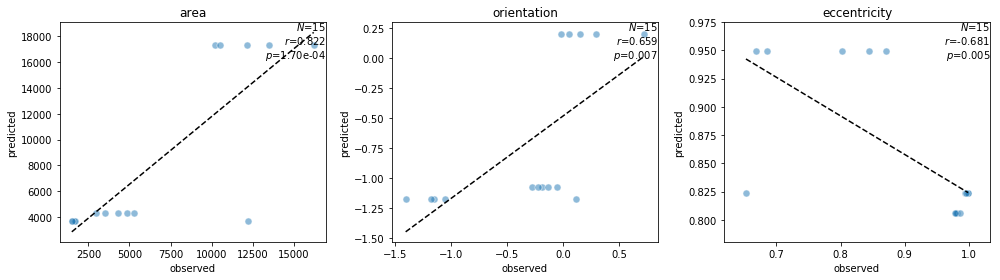

In [7]:
fig, axes = plt.subplots(ncols=3, figsize=(14, 4))
for col, ax in zip(['area', 'orientation', 'eccentricity'], axes):
    argus_shapes.viz.scatter_correlation(y[col], y_pred[col], ax)
    ax.set_title(col)
    ax.set_xlabel('observed')
    ax.set_ylabel('predicted')
fig.tight_layout()